In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import

In [2]:
nut_21=pd.read_excel("Nutrients_data_2021_Chris.xlsx",sheet_name='Nutrient_surface_2021', skiprows=1)
nut_21.head()

,S/N,No.,Cruise Type,Date,Sample name,Latitude,Longitude,NO3 NO2- Results [uM N],PO4- Results [µM],PO4 µg/L,NO2- Results [µM],NO2 µg/L,NH4- Results [umol N/liter],NH4 µg/L,NO3- Results [uM N],NO3 µg/L,Salinity,Temperature,pH,Chl-a (µg/L)
0,1.0,1.0,WMS,2021-06-02,WMS- 1 S,30.3033,-89.2476,2.81,0.87,82.625118,0.056,2.576308,1.61,29.04279,2.754,170.761495,2.413,26.444,8.1,7.8848
1,2.0,4.0,WMS,2021-06-02,WMS- 2 S,30.2946,-89.2515,1.66,0.77,73.127978,0.079,3.634434,1.23,22.18797,1.581,98.029747,3.074,26.530,8.1,7.8736
2,3.0,7.0,WMS,2021-06-02,WMS- 3 S,30.2886,-89.2434,0.39,0.72,68.379408,0.021,0.966116,0.18,3.24702,0.369,22.879808,4.639,26.298,8.3,5.2976
3,4.0,10.0,WMS,2021-06-02,WMS- 4 S,30.2860,-89.2537,2.19,0.69,65.530266,0.039,1.794214,1.19,21.46641,2.151,133.372540,4.632,26.306,8.3,5.4656
4,5.0,13.0,WMS,2021-06-02,WMS- 5 S,30.2774,-89.2503,0.54,0.70,66.479980,0.020,0.920110,0.48,8.65872,0.520,32.242548,4.995,26.476,8.2,4.7040


In [3]:
nut_22=pd.read_excel("Nutrients_data_surface 2022.xlsx", skiprows=1)
nut_22.head()

,S/N,No.,Cruise Type,Date,Sample name,Latitude,Longitude,NO3 NO2- Results [uM N],PO4- Results [µM],PO4- (µg/L),NO2- Results [µM],NO2- (µg/L),NH4- Results [umol N/liter],NH4- (µg/L),NO3- Results [uM N],NO3- (µg/L),Chl-a (µg/L),Ph,Salinity (PSU),Temperature (°C)
0,1,1,WMS,2022-09-12,Site- 1 Top,30.307810,-89.248272,1.49,1.04,98.770256,0.024,2.279314,7.72,139.26108,1.466,90.899183,3.7408,8.0,20,28.798
1,2,2,WMS,2022-09-12,Site- 2 Top,30.304473,-89.245440,1.35,1.19,113.015966,0.008,0.759771,0.28,5.05092,1.342,83.210576,6.3840,8.3,24,30.044
2,3,5,WMS,2022-09-12,Site- 3 Top,30.301328,-89.246917,1.47,1.18,112.066252,0.011,1.044685,0.26,4.69014,1.459,90.465149,4.4352,8.3,23,30.040
3,4,8,WMS,2022-09-12,Site- 4 Top,30.298042,-89.249422,1.23,1.09,103.518826,0.035,3.323999,4.69,84.60291,1.195,74.095855,3.6064,8.3,22,30.028
4,5,10,WMS,2022-09-12,Site- 5 Top,30.297145,-89.260518,1.52,0.97,92.122258,0.014,1.329600,0.49,8.83911,1.506,93.379379,3.5168,8.2,21,30.854


In [4]:
nut_21.shape

(31, 20)

# Cleaning

In [5]:
nut_22=nut_22.drop(columns=[col for col in nut_22.columns if 'Results' in col])
nut_21=nut_21.drop(columns=[col for col in nut_21.columns if 'Results' in col])

In [6]:
nut_22.columns=[col.replace("(µg/L)", "").replace('(PSU)', 
                                   '').replace('(°C)', '').replace('-', 
                                                                   '').strip().lower().replace(' ', 
                                                                                               '_') for col in nut_22.columns]

In [7]:
nut_21.columns=[col.replace("(µg/L)", "").replace("µg/L", "").replace('(PSU)', 
                                   '').replace('(°C)', '').replace('-', 
                                                                   '').strip().lower().replace(' ', 
                                                                                               '_') for col in nut_21.columns]

In [8]:
print(nut_21.shape)
print(nut_22.shape)

(31, 15)
(19, 15)


In [9]:
nutrients_data = pd.concat([nut_21, nut_22]).reset_index(drop=True).dropna(how='all')
nutrients_data.head()

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,no3,salinity,temperature,ph,chla
0,1.0,1.0,WMS,2021-06-02,WMS- 1 S,30.3033,-89.2476,82.625118,2.576308,29.04279,170.761495,2.413,26.444,8.1,7.8848
1,2.0,4.0,WMS,2021-06-02,WMS- 2 S,30.2946,-89.2515,73.127978,3.634434,22.18797,98.029747,3.074,26.530,8.1,7.8736
2,3.0,7.0,WMS,2021-06-02,WMS- 3 S,30.2886,-89.2434,68.379408,0.966116,3.24702,22.879808,4.639,26.298,8.3,5.2976
3,4.0,10.0,WMS,2021-06-02,WMS- 4 S,30.2860,-89.2537,65.530266,1.794214,21.46641,133.372540,4.632,26.306,8.3,5.4656
4,5.0,13.0,WMS,2021-06-02,WMS- 5 S,30.2774,-89.2503,66.479980,0.920110,8.65872,32.242548,4.995,26.476,8.2,4.7040


In [10]:
nutrients_data.shape

(49, 15)

In [11]:
nutrients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   s/n          49 non-null     float64       
 1   no.          49 non-null     float64       
 2   cruise_type  49 non-null     object        
 3   date         49 non-null     datetime64[ns]
 4   sample_name  49 non-null     object        
 5   latitude     49 non-null     float64       
 6   longitude    49 non-null     float64       
 7   po4          49 non-null     float64       
 8   no2          49 non-null     float64       
 9   nh4          49 non-null     float64       
 10  no3          49 non-null     float64       
 11  salinity     49 non-null     float64       
 12  temperature  49 non-null     float64       
 13  ph           49 non-null     float64       
 14  chla         49 non-null     float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 

# Import Tracemetal

In [66]:
trace_df = pd.read_csv('tracemetal_analysis_datacom.csv')
trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Al27         103 non-null    float64
 1   As75         103 non-null    float64
 2   Be9          103 non-null    float64
 3   Cd111        103 non-null    float64
 4   Cr52         103 non-null    float64
 5   Cs133        103 non-null    float64
 6   Cu63         103 non-null    float64
 7   Fe57         103 non-null    float64
 8   Li7          103 non-null    float64
 9   Mo98         103 non-null    float64
 10  Ni60         103 non-null    float64
 11  Se82         103 non-null    float64
 12  V51          103 non-null    float64
 13  Zn66         103 non-null    float64
 14  Sample       232 non-null    float64
 15  Date         101 non-null    object 
 16  Sample name  101 non-null    object 
dtypes: float64(15), object(2)
memory usage: 30.9+ KB


In [67]:

trace_df.columns=[col.lower().replace(' ', '_') for col in trace_df.columns]
trace_df.head()


,al27,as75,be9,cd111,cr52,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample,date,sample_name
0,0.015412,0.061612,0.000578,0.004044,0.003012,0.000871,0.026273,1.172270,0.019143,0.000431,0.018749,0.004568,0.037384,0.012315,1.0,2020-11-12,WMS- 1 Top
1,0.010499,0.065070,0.000015,0.000064,0.001458,0.000481,0.018444,2.316004,0.022261,0.000645,0.036993,0.051891,0.106531,0.003843,2.0,2020-11-12,WMS- 2 Top
2,0.007947,0.190758,0.000005,0.000126,0.002773,0.000694,0.047532,5.176143,0.080861,0.001298,0.111346,0.219681,0.486823,0.004246,3.0,2020-11-12,WMS- 3 Top
3,0.011442,0.231385,0.000068,0.000142,0.004573,0.000704,0.058683,6.923928,0.114305,0.002236,0.152092,0.314248,0.722037,0.006565,4.0,2020-11-12,WMS- 4 Top
4,0.006926,0.081072,0.000069,0.000095,0.002539,0.000546,0.022712,3.306395,0.039270,0.000739,0.065394,0.137612,0.285364,0.010310,5.0,2020-11-12,WMS- 5 Top


In [68]:
trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   al27         103 non-null    float64
 1   as75         103 non-null    float64
 2   be9          103 non-null    float64
 3   cd111        103 non-null    float64
 4   cr52         103 non-null    float64
 5   cs133        103 non-null    float64
 6   cu63         103 non-null    float64
 7   fe57         103 non-null    float64
 8   li7          103 non-null    float64
 9   mo98         103 non-null    float64
 10  ni60         103 non-null    float64
 11  se82         103 non-null    float64
 12  v51          103 non-null    float64
 13  zn66         103 non-null    float64
 14  sample       232 non-null    float64
 15  date         101 non-null    object 
 16  sample_name  101 non-null    object 
dtypes: float64(15), object(2)
memory usage: 30.9+ KB


# Merging

In [69]:
nutrients_data.head()

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,no3,salinity,temperature,ph,chla
0,1.0,1.0,WMS,2021-06-02,WMS-1S,30.3033,-89.2476,82.625118,2.576308,29.04279,170.761495,2.413,26.444,8.1,7.8848
1,2.0,4.0,WMS,2021-06-02,WMS-2S,30.2946,-89.2515,73.127978,3.634434,22.18797,98.029747,3.074,26.530,8.1,7.8736
2,3.0,7.0,WMS,2021-06-02,WMS-3S,30.2886,-89.2434,68.379408,0.966116,3.24702,22.879808,4.639,26.298,8.3,5.2976
3,4.0,10.0,WMS,2021-06-02,WMS-4S,30.2860,-89.2537,65.530266,1.794214,21.46641,133.372540,4.632,26.306,8.3,5.4656
4,5.0,13.0,WMS,2021-06-02,WMS-5S,30.2774,-89.2503,66.479980,0.920110,8.65872,32.242548,4.995,26.476,8.2,4.7040


In [70]:
nutrients_data['sample_name'].unique()

array(['WMS-1S', 'WMS-2S', 'WMS-3S', 'WMS-4S', 'WMS-5S', 'WMS-6S',
       'WMS-7S', 'WMS-8S', 'WMS-9S', 'WMS-10S', 'WMS-11S', 'WMS-12S',
       'U12-S', 'U13-S', 'U14-S', 'U15-S', 'U16-S', 'U17-S', 'U18-S',
       'U19-S', 'U20-S', 'U21-S', 'U22-S', 'U23-S', 'U24-S', 'U25-S',
       'U26-S', 'U27-S', 'U28-S', 'U29-S', 'SITE-1TOP', 'SITE-2TOP',
       'SITE-3TOP', 'SITE-4TOP', 'SITE-5TOP', 'SITE-6TOP', 'SITE-7TOP',
       'SITE-8TOP', 'SITE-11TOP', 'SITE-17TOP', 'SITE-18TOP',
       'SITE-19TOP', 'SITE-20TOP', 'SITE-21TOP', 'SITE-22TOP',
       'SITE-23TOP', 'SITE-25TOP', 'SITE-26TOP', 'SITE-27TOP'],
      dtype=object)

In [71]:
nutrients_data[nutrients_data['sample_name']=='WMS- 1 S']

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,no3,salinity,temperature,ph,chla


In [72]:
[col for col in nutrients_data['sample_name'].unique() if col not in trace_df['sample_name'].unique()]

['WMS-1S',
 'WMS-2S',
 'WMS-3S',
 'WMS-4S',
 'WMS-5S',
 'WMS-6S',
 'WMS-7S',
 'WMS-8S',
 'WMS-9S',
 'WMS-10S',
 'WMS-11S',
 'WMS-12S',
 'U12-S',
 'U13-S',
 'U14-S',
 'U15-S',
 'U16-S',
 'U17-S',
 'U18-S',
 'U19-S',
 'U20-S',
 'U21-S',
 'U22-S',
 'U23-S',
 'U24-S',
 'U25-S',
 'U26-S',
 'U27-S',
 'U28-S',
 'U29-S',
 'SITE-1TOP',
 'SITE-2TOP',
 'SITE-3TOP',
 'SITE-4TOP',
 'SITE-5TOP',
 'SITE-6TOP',
 'SITE-7TOP',
 'SITE-8TOP',
 'SITE-11TOP',
 'SITE-17TOP',
 'SITE-18TOP',
 'SITE-19TOP',
 'SITE-20TOP',
 'SITE-21TOP',
 'SITE-22TOP',
 'SITE-23TOP',
 'SITE-25TOP',
 'SITE-26TOP',
 'SITE-27TOP']

In [73]:
[col for col in trace_df['sample_name'].unique() if col not in nutrients_data['sample_name'].unique()]

['WMS- 1 Top',
 'WMS- 2 Top',
 'WMS- 3 Top',
 'WMS- 4 Top',
 'WMS- 5 Top',
 'WMS- 6 Top',
 'WMS- 7 Top',
 'WMS- 8 Top',
 'WMS- 9 Top',
 'WMS- 10 Top',
 'WMS- 11 Top',
 'WMS- 12 Top',
 'WMS- 1 S',
 'WMS- 2 S',
 'WMS- 3 S',
 'WMS- 4 S',
 'WMS- 5 S',
 'WMS- 6 S',
 'WMS- 7 S',
 'WMS- 8 S',
 'WMS- 9 S',
 'WMS- 10 S',
 'WMS- 11 S',
 'WMS- 12 S',
 'U1- Surface',
 'U2- Surface',
 'U3- Surface',
 nan,
 'U5- S',
 'U6- S',
 'U7- S',
 'U8- S',
 'U9- S',
 'U10- S',
 'U11- S',
 'U12- S',
 'U13- S',
 'U14- S',
 'U15- S',
 'U16- S',
 'U17- S',
 'U18- S',
 'U19 -S',
 'U20- S',
 'U21 -S',
 'U22- S',
 'U23- S',
 'U24- S',
 'U26- S',
 'U27- S',
 'U28- S',
 'U30- S',
 'U31- S',
 'U32- S',
 'U33- S',
 'U34- S',
 'U35- S',
 'U36- S',
 'U37- S',
 'U38- S',
 'U39- S',
 'U40- S',
 'U41- S',
 'WMS- 1 Surface',
 'WMS- 2 Surface',
 'WMS- 3 Surface',
 'WMS- 4 Surface',
 'WMS- 5 Surface',
 'WMS- 6 Surface',
 'WMS- 7 Surface',
 'WMS- 8 Surface',
 'WMS- 9 Surface',
 'WMS- 10 Surface',
 'WMS- 11 Surface',
 'WMS- 12 Sur

In [74]:
#nutrients_data['sample_name']=nutrients_data['sample_name'].str.replace('Site', 'WMS')

In [75]:
trace_df[trace_df['sample_name']=='WMS- 3 Top']

,al27,as75,be9,cd111,cr52,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample,date,sample_name
2,0.007947,0.190758,0.000005,0.000126,0.002773,0.000694,0.047532,5.176143,0.080861,0.001298,0.111346,0.219681,0.486823,0.004246,3.0,2020-11-12,WMS- 3 Top


In [76]:
nutrients_data[nutrients_data['sample_name']=='WMS- 2 Top']

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,no3,salinity,temperature,ph,chla


In [77]:
end

NameError: name 'end' is not defined

In [78]:
nutrients_data['date']=nutrients_data['date'].astype(str)
trace_df['date']=trace_df['date'].astype(str)

In [79]:
nutrients_data['sample_name']=nutrients_data['sample_name'].astype(str).str.strip().str.upper().str.replace(' ','')
trace_df['sample_name']=trace_df['sample_name'].astype(str).str.strip().str.upper().str.replace(' ','')

In [80]:
trace_df[trace_df['sample_name']=='SITE-2TOP']

,al27,as75,be9,cd111,cr52,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample,date,sample_name
79,0.04129,0.703343,0.000084,0.000358,0.003398,0.000228,0.07835,16.943943,0.117044,0.007957,0.237555,0.315716,0.78941,0.006184,80.0,2022-09-12,SITE-2TOP


In [83]:
trace_df.columns

Index(['al27', 'as75', 'be9', 'cd111', 'cr52', 'cs133', 'cu63', 'fe57', 'li7',
       'mo98', 'ni60', 'se82', 'v51', 'zn66', 'sample', 'date', 'sample_name'],
      dtype='object')

In [84]:
for item in ['al27', 'as75', 'be9', 'cd111', 'cr52', 'cs133', 'cu63', 'fe57', 'li7',
       'mo98', 'ni60', 'se82', 'v51', 'zn66']:
    trace_df[item]=trace_df[item].astype(float)*1000

In [85]:
trace_df

,al27,as75,be9,cd111,cr52,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample,date,sample_name
0,15.411731,61.611953,0.578236,4.044081,3.011707,0.870910,26.273403,1172.270373,19.142524,0.431082,18.749389,4.567661,37.383502,12.314745,1.0,2020-11-12,WMS-1TOP
1,10.499444,65.070299,0.015472,0.063866,1.458055,0.481206,18.444344,2316.003751,22.260720,0.644575,36.993126,51.890850,106.530880,3.842701,2.0,2020-11-12,WMS-2TOP
2,7.946906,190.757757,0.005171,0.125901,2.773220,0.694004,47.531561,5176.142738,80.860772,1.297768,111.345524,219.681359,486.823108,4.245992,3.0,2020-11-12,WMS-3TOP
3,11.442402,231.385316,0.068318,0.142227,4.573060,0.704171,58.683232,6923.927921,114.304884,2.235612,152.091747,314.248207,722.036984,6.564550,4.0,2020-11-12,WMS-4TOP
4,6.926269,81.072188,0.068710,0.095156,2.538791,0.546063,22.712399,3306.394527,39.269803,0.739307,65.394407,137.611874,285.364239,10.310262,5.0,2020-11-12,WMS-5TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.0,nan,NAN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,nan,NAN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,nan,NAN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0,nan,NAN


In [ ]:
nutrient_trace_df=pd.merge(nutrients_data, trace_df, on=['sample_name', 'date'])
nutrient_trace_df

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,...,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample
0,1.0,1.0,WMS,2021-06-02,WMS-1S,30.303300,-89.247600,82.625118,2.576308,29.04279,...,0.270881,17.682293,2658.890767,29.452812,1.085825,58.483449,162.725432,341.658463,9.187379,14.0
1,2.0,4.0,WMS,2021-06-02,WMS-2S,30.294600,-89.251500,73.127978,3.634434,22.18797,...,0.537799,51.982674,5521.099197,100.854170,2.008290,135.909671,317.265920,702.512903,4.929590,15.0
2,3.0,7.0,WMS,2021-06-02,WMS-3S,30.288600,-89.243400,68.379408,0.966116,3.24702,...,0.420319,24.192142,3511.462302,41.311687,1.149571,77.155357,180.402336,393.741435,9.038994,16.0
3,4.0,10.0,WMS,2021-06-02,WMS-4S,30.286000,-89.253700,65.530266,1.794214,21.46641,...,0.647624,18.173939,2483.719546,25.871853,0.767177,50.134338,126.099272,260.336582,4.821689,17.0
4,5.0,13.0,WMS,2021-06-02,WMS-5S,30.277400,-89.250300,66.479980,0.920110,8.65872,...,0.706978,49.989866,5830.407596,102.989398,1.851592,139.435390,321.442095,675.612569,6.510343,18.0
5,6.0,16.0,WMS,2021-06-02,WMS-6S,30.276500,-89.261300,75.977120,2.162259,12.62730,...,0.650996,55.543834,5585.502066,110.575626,2.306314,142.792794,344.616370,740.023144,6.489232,19.0
6,7.0,19.0,WMS,2021-06-02,WMS-7S,30.284900,-89.264000,78.826262,1.840220,37.52112,...,0.891336,49.107197,5744.751723,106.659167,2.877080,138.840197,334.933071,726.635203,7.732447,20.0
7,8.0,22.0,WMS,2021-06-02,WMS-8S,30.281800,-89.273800,71.228550,0.874104,18.03900,...,0.858352,50.871005,5522.409642,110.551767,2.094936,142.300642,344.106114,759.360660,5.163915,21.0
8,9.0,25.0,WMS,2021-06-02,WMS-9S,30.282200,-89.284500,78.826262,1.702203,41.85048,...,0.615191,50.132846,5820.378275,107.608595,2.085857,140.246547,313.426119,721.925986,4.923529,22.0
9,10.0,28.0,WMS,2021-06-02,WMS-10S,30.279900,-89.294600,74.077692,2.392286,15.87432,...,1.178789,63.800837,5331.638273,117.262058,2.222189,138.032917,288.440138,690.057650,5.173552,23.0


In [ ]:
nutrient_trace_df=pd.merge(nutrients_data, trace_df, on=['sample_name', 'date'])
nutrient_trace_df

,s/n,no.,cruise_type,date,sample_name,latitude,longitude,po4,no2,nh4,...,cs133,cu63,fe57,li7,mo98,ni60,se82,v51,zn66,sample
0,1.0,1.0,WMS,2021-06-02,WMS-1S,30.303300,-89.247600,82.625118,2.576308,29.04279,...,0.270881,17.682293,2658.890767,29.452812,1.085825,58.483449,162.725432,341.658463,9.187379,14.0
1,2.0,4.0,WMS,2021-06-02,WMS-2S,30.294600,-89.251500,73.127978,3.634434,22.18797,...,0.537799,51.982674,5521.099197,100.854170,2.008290,135.909671,317.265920,702.512903,4.929590,15.0
2,3.0,7.0,WMS,2021-06-02,WMS-3S,30.288600,-89.243400,68.379408,0.966116,3.24702,...,0.420319,24.192142,3511.462302,41.311687,1.149571,77.155357,180.402336,393.741435,9.038994,16.0
3,4.0,10.0,WMS,2021-06-02,WMS-4S,30.286000,-89.253700,65.530266,1.794214,21.46641,...,0.647624,18.173939,2483.719546,25.871853,0.767177,50.134338,126.099272,260.336582,4.821689,17.0
4,5.0,13.0,WMS,2021-06-02,WMS-5S,30.277400,-89.250300,66.479980,0.920110,8.65872,...,0.706978,49.989866,5830.407596,102.989398,1.851592,139.435390,321.442095,675.612569,6.510343,18.0
5,6.0,16.0,WMS,2021-06-02,WMS-6S,30.276500,-89.261300,75.977120,2.162259,12.62730,...,0.650996,55.543834,5585.502066,110.575626,2.306314,142.792794,344.616370,740.023144,6.489232,19.0
6,7.0,19.0,WMS,2021-06-02,WMS-7S,30.284900,-89.264000,78.826262,1.840220,37.52112,...,0.891336,49.107197,5744.751723,106.659167,2.877080,138.840197,334.933071,726.635203,7.732447,20.0
7,8.0,22.0,WMS,2021-06-02,WMS-8S,30.281800,-89.273800,71.228550,0.874104,18.03900,...,0.858352,50.871005,5522.409642,110.551767,2.094936,142.300642,344.106114,759.360660,5.163915,21.0
8,9.0,25.0,WMS,2021-06-02,WMS-9S,30.282200,-89.284500,78.826262,1.702203,41.85048,...,0.615191,50.132846,5820.378275,107.608595,2.085857,140.246547,313.426119,721.925986,4.923529,22.0
9,10.0,28.0,WMS,2021-06-02,WMS-10S,30.279900,-89.294600,74.077692,2.392286,15.87432,...,1.178789,63.800837,5331.638273,117.262058,2.222189,138.032917,288.440138,690.057650,5.173552,23.0


In [87]:
nutrient_trace_df.to_csv('nutrient_trace_data.csv', index=False)

# Data Analysis

In [89]:
nutrient_trace_df.columns

Index(['s/n', 'no.', 'cruise_type', 'date', 'sample_name', 'latitude',
       'longitude', 'po4', 'no2', 'nh4', 'no3', 'salinity', 'temperature',
       'ph', 'chla', 'al27', 'as75', 'be9', 'cd111', 'cr52', 'cs133', 'cu63',
       'fe57', 'li7', 'mo98', 'ni60', 'se82', 'v51', 'zn66', 'sample'],
      dtype='object')

In [118]:
trace= ['al27', 'as75', 'be9', 'cd111', 'cr52', 'cs133', 'cu63',
       'fe57', 'li7', 'mo98', 'ni60', 'se82', 'v51', 'zn66',]
nutrient=['po4', 'nh4', 'no3',]
water_qual=[ 'salinity', 'temperature', 'ph', 'chla']

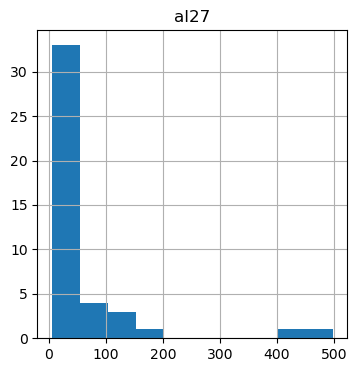

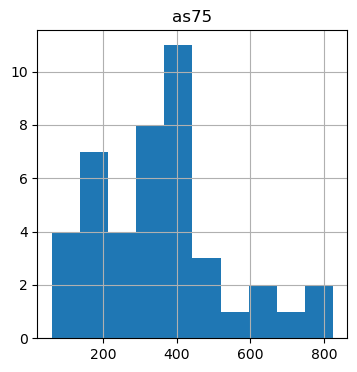

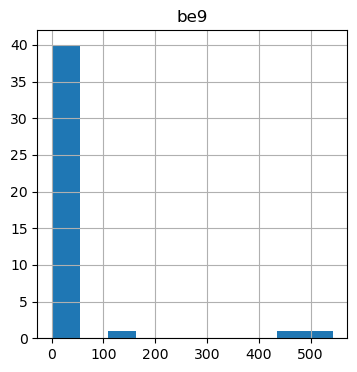

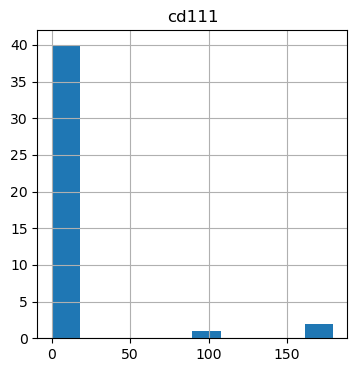

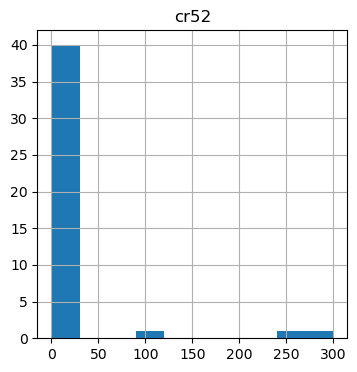

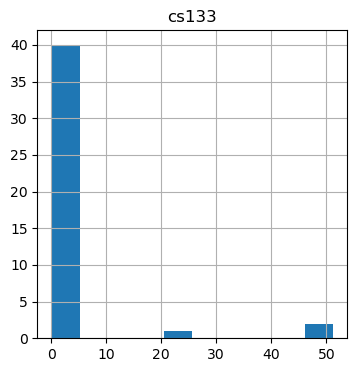

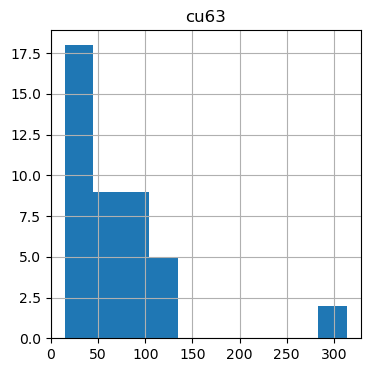

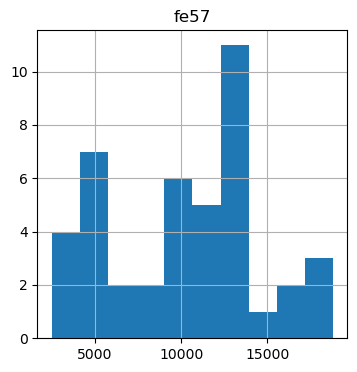

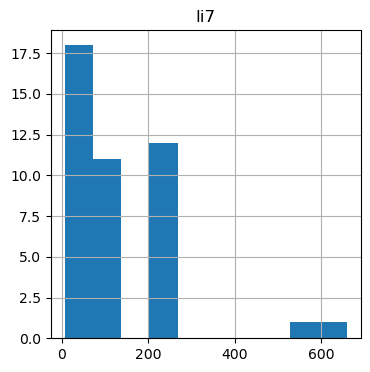

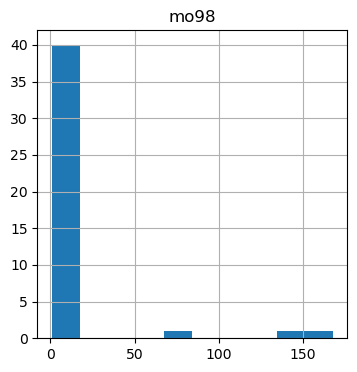

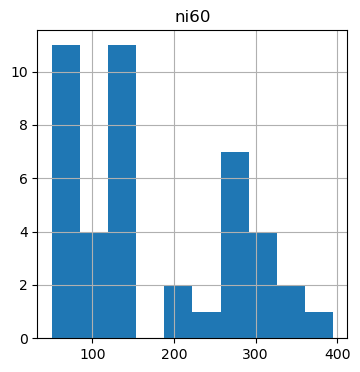

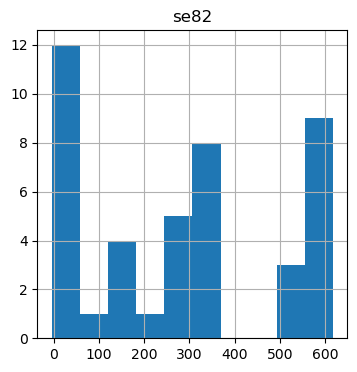

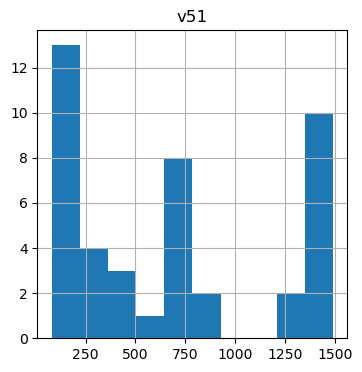

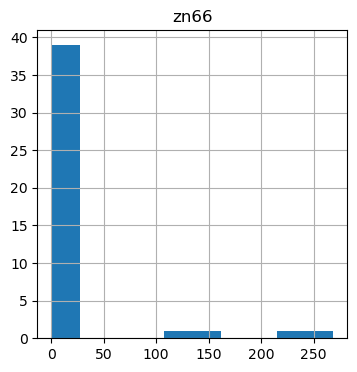

In [94]:
for i in trace:
    plt.figure(figsize=(4,4))
    nutrient_trace_df[i].hist()
    plt.title(i)


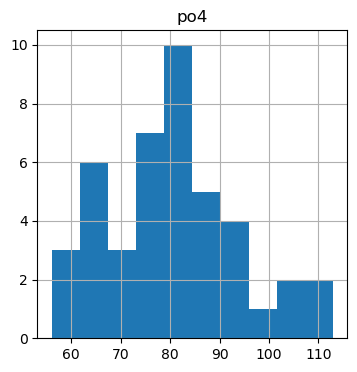

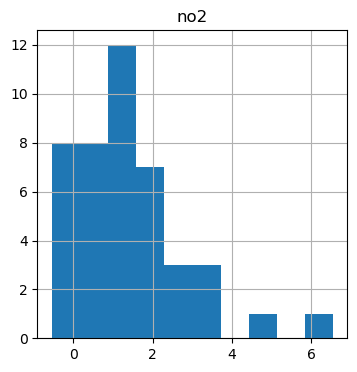

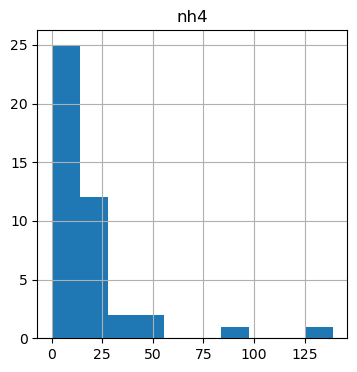

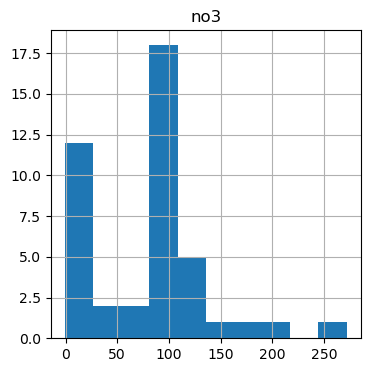

In [95]:
for i in nutrient:
    plt.figure(figsize=(4,4))
    nutrient_trace_df[i].hist()
    plt.title(i)

In [111]:
def plot_scatter (ax, df, col1, col2):
    df_21=df[df['year']=='2021']
    df_22=df[df['year']=='2022']
    ax.scatter(df_21[col1], df_21[col2], label='2021', color='blue')
    ax.scatter(df_22[col1], df_22[col2], label='2022', color='red')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()
    ax.set_title(f'{col1} vs {col2}')

## Water Quality Parameters

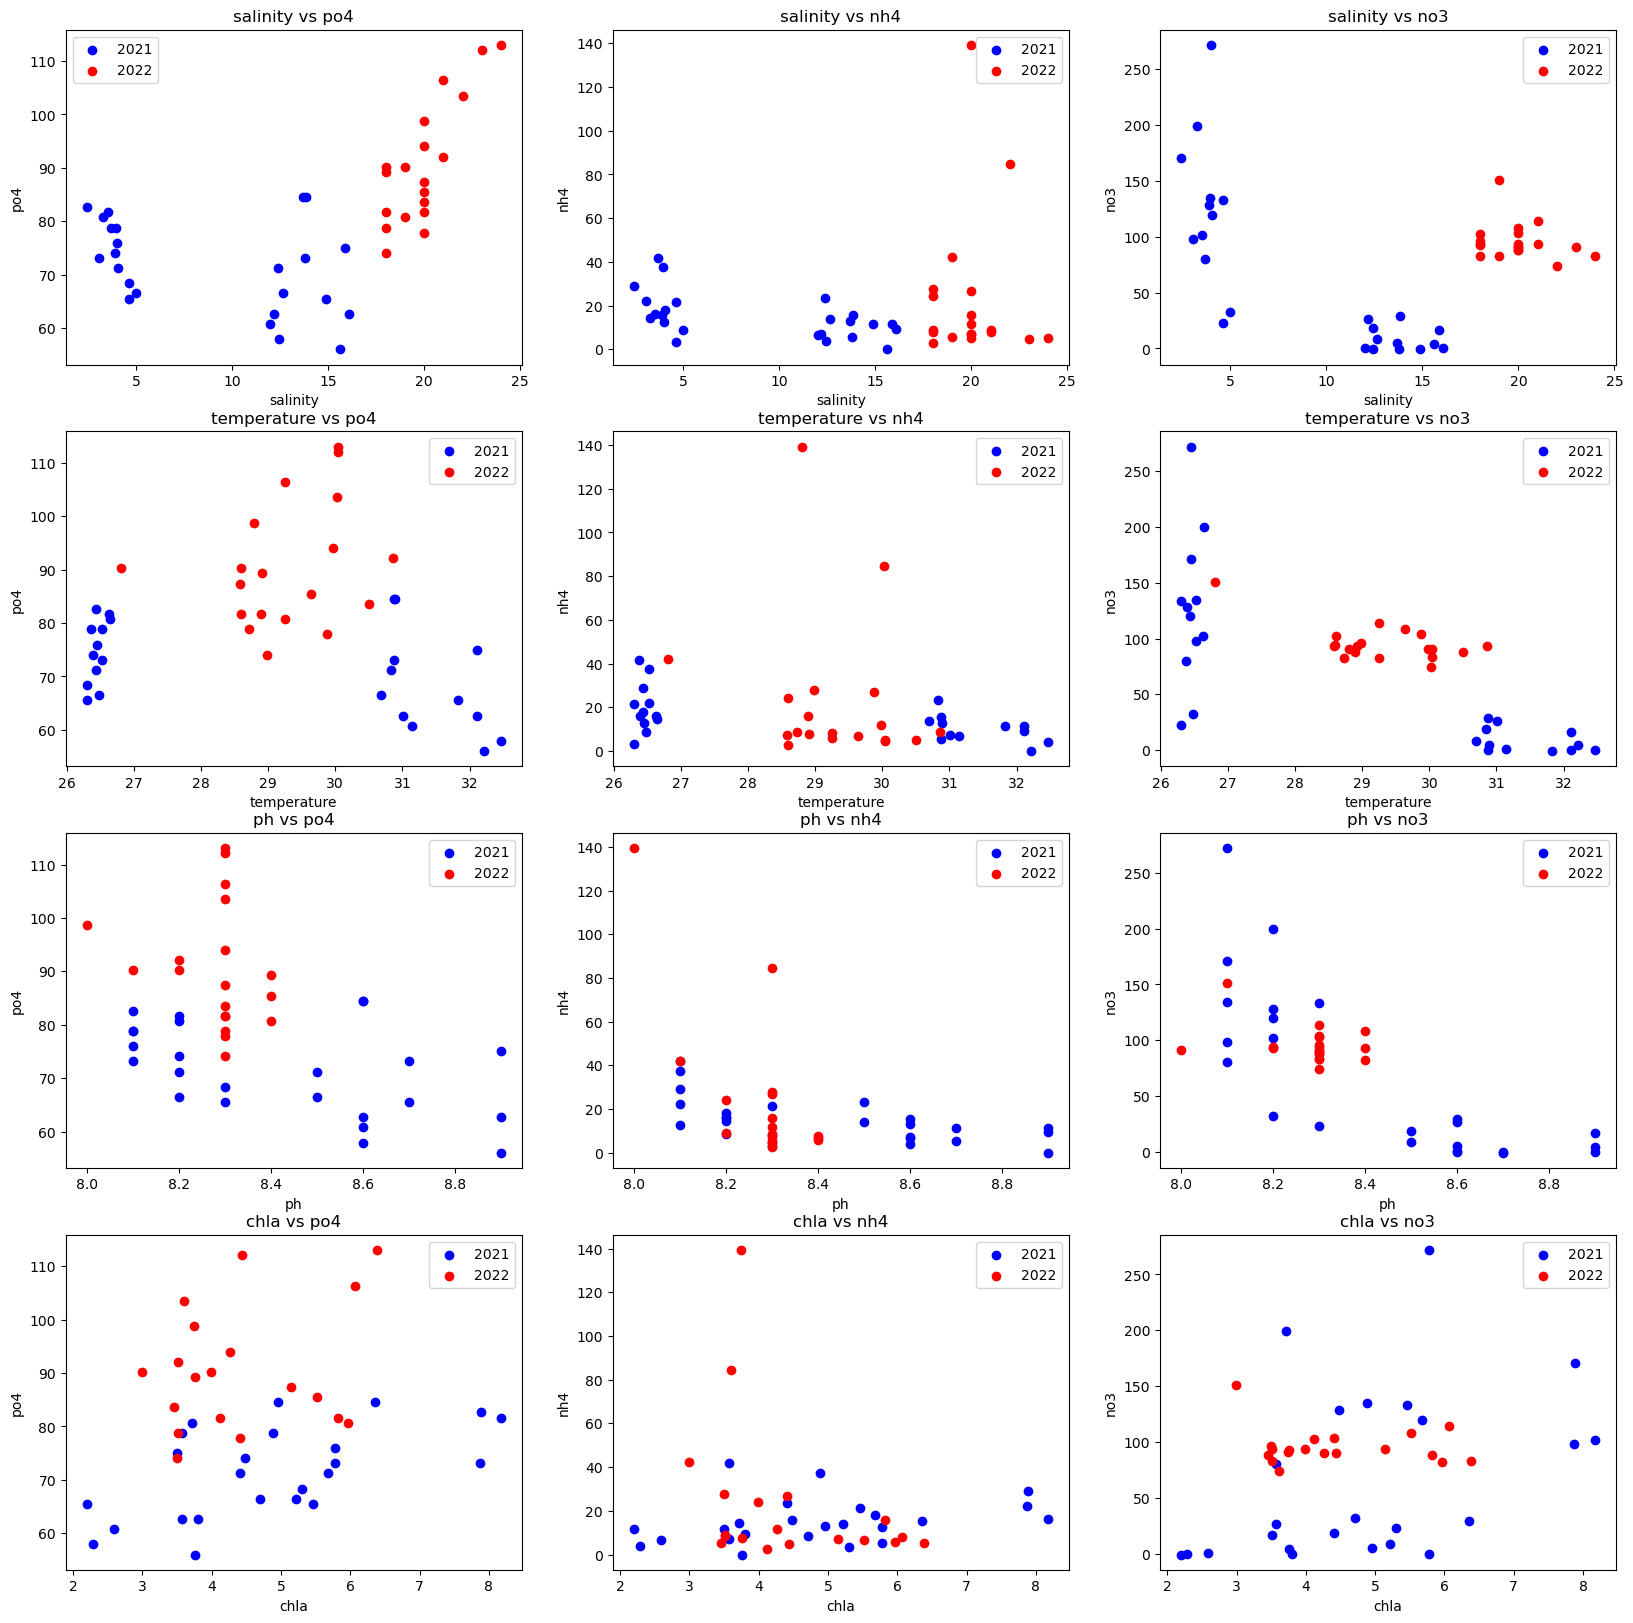

In [119]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

plot_scatter(ax[0, 0], nutrient_trace_df, water_qual[0], nutrient[0])
plot_scatter(ax[0, 1], nutrient_trace_df, water_qual[0], nutrient[1])
plot_scatter(ax[0, 2], nutrient_trace_df, water_qual[0], nutrient[2])
# plot_scatter(ax[0, 3], nutrient_trace_df, water_qual[0], nutrient[3])


plot_scatter(ax[1, 0], nutrient_trace_df, water_qual[1], nutrient[0])
plot_scatter(ax[1, 1], nutrient_trace_df, water_qual[1], nutrient[1])
plot_scatter(ax[1, 2], nutrient_trace_df, water_qual[1], nutrient[2])
# plot_scatter(ax[1, 3], nutrient_trace_df, water_qual[1], nutrient[3])


plot_scatter(ax[2, 0], nutrient_trace_df, water_qual[2], nutrient[0])
plot_scatter(ax[2, 1], nutrient_trace_df, water_qual[2], nutrient[1])
plot_scatter(ax[2, 2], nutrient_trace_df, water_qual[2], nutrient[2])
# plot_scatter(ax[2, 3], nutrient_trace_df, water_qual[2], nutrient[3])



plot_scatter(ax[3, 0], nutrient_trace_df, water_qual[3], nutrient[0])
plot_scatter(ax[3, 1], nutrient_trace_df, water_qual[3], nutrient[1])
plot_scatter(ax[3, 2], nutrient_trace_df, water_qual[3], nutrient[2])
# plot_scatter(ax[3, 3], nutrient_trace_df, water_qual[3], nutrient[3])

## Trace

In [98]:
nutrient_trace_df['year']=nutrient_trace_df['date'].str.split('-').str[0]

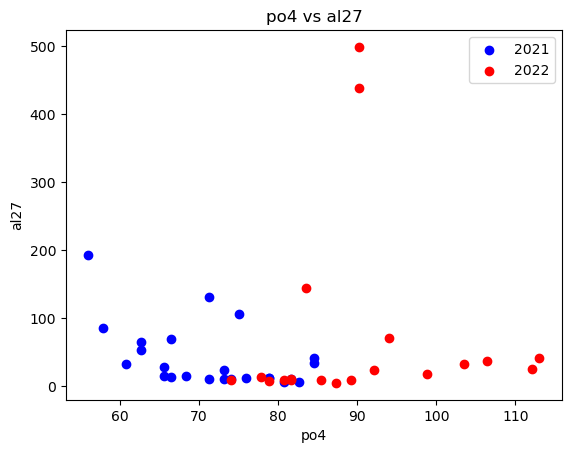

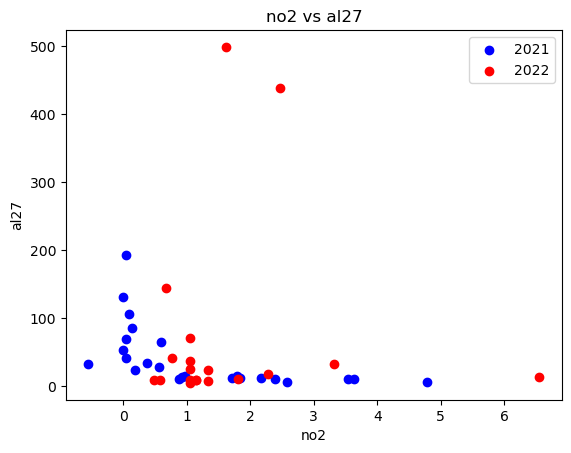

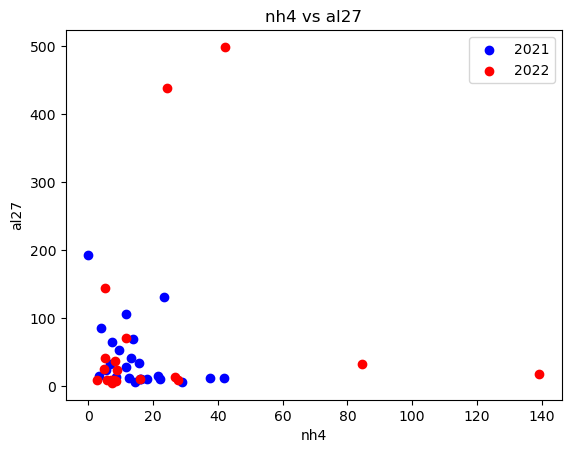

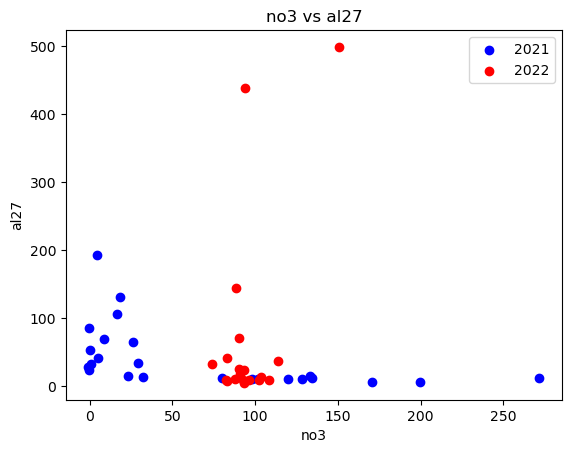

In [ ]:
for nut in nutrient:
    plot_scatter(nutrient_trace_df, nut, trace[0])